In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv("/content/train.csv")

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.size

10692

In [45]:
df.shape

(891, 12)

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
l1 = ['PassengerId','Cabin','Ticket']

In [48]:
df.drop(l1, axis=1, inplace=True)

In [49]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [50]:
temp = df["Name"].unique()

In [51]:
temp[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [52]:
st = []

for i in temp:
  a = i.split(' ')
  for k in a:
    if '.' in k:
      st.append(k)
      break



In [53]:
st[:10]

['Mr.',
 'Mrs.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mrs.']

In [54]:
type(st)

list

In [55]:
st = np.array(st)
df["New_Name"] = st

In [56]:
type(st)

numpy.ndarray

In [57]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [58]:
df["New_Name"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [59]:
l2 = ['Name']
df.drop(l2, axis=1, inplace=True)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [61]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
New_Name      0
dtype: int64

In [62]:
emb = list(df["Embarked"].mode())[0]
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Embarked"].fillna(emb, inplace=True)


In [63]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
New_Name    0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
le_s = LabelEncoder()
le_n = LabelEncoder()
le_e = LabelEncoder()

In [65]:
df["Sex"] = le_s.fit_transform(df["Sex"])
df["New_Name"] = le_n.fit_transform(df["New_Name"])
df["Embarked"] = le_e.fit_transform(df["Embarked"])

In [66]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,1,22.0,1,0,7.2500,2,12
1,1,1,0,38.0,1,0,71.2833,0,13
2,1,3,0,26.0,0,0,7.9250,2,9
3,1,1,0,35.0,1,0,53.1000,2,13
4,0,3,1,35.0,0,0,8.0500,2,12


In [67]:
df.shape

(891, 9)

In [68]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

In [69]:
X.shape, Y.shape

((891, 8), (891,))

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2 )

In [79]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [86]:
x_train[:5], x_test[:5]

(array([[ 0.80935725,  0.73108328,  0.02116721, -0.46700197, -0.47498621,
         -0.48754791, -0.65634947,  0.44697347],
        [-0.3886934 , -1.36783323,  0.42480561, -0.46700197, -0.47498621,
         -0.21894283,  0.59652136, -1.16032508],
        [-0.3886934 , -1.36783323,  0.04407805,  2.31159471, -0.47498621,
         -0.21894283,  0.59652136,  0.98273966],
        [ 0.80935725,  0.73108328, -0.18435848, -0.46700197, -0.47498621,
         -0.48611535,  0.59652136,  0.44697347],
        [ 0.80935725, -1.36783323,  0.02116721, -0.46700197, -0.47498621,
         -0.48704207, -0.65634947, -1.16032508]]),
 array([[-1.48971543, -1.3084805 , -1.19694982, -0.50476191,  0.6986454 ,
          0.47928947, -2.08744543, -1.32888762],
        [-1.48971543, -1.3084805 ,  0.0966269 , -0.50476191, -0.47011653,
          0.84124056, -2.08744543, -1.32888762],
        [-1.48971543, -1.3084805 , -0.08939609,  0.33965287, -0.47011653,
          0.35839139,  0.54391184,  0.84842024],
        [ 0.90

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=3)

In [82]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [83]:
y_pred = clf.predict(x_train)

In [84]:
clf.score(x_train, y_train)

0.8286516853932584

In [85]:
clf.score(x_test, y_test)

0.8491620111731844

ANN

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [88]:
x_train.shape, y_train.shape

((712, 8), (712,))

In [89]:
clf = Sequential()

First layer

In [90]:
clf.add(Dense(units=32, activation='relu', input_shape=(8,)))

Hidden layer

In [92]:
clf.add(Dense(units=32, activation='relu'))

Output layer

In [93]:
clf.add(Dense(units=1, activation='sigmoid'))

Compile

In [95]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [97]:
clf.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
18/18 [==============================] - 13s 31ms/step - loss: 0.7002 - accuracy: 0.6219 - val_loss: 0.6479 - val_accuracy: 0.6154
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.7100 - val_loss: 0.5892 - val_accuracy: 0.7622
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5616 - accuracy: 0.7695 - val_loss: 0.5432 - val_accuracy: 0.7972
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.8338 - val_loss: 0.5160 - val_accuracy: 0.7762
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8324 - val_loss: 0.4998 - val_accuracy: 0.7762
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8395 - val_loss: 0.4875 - val_accuracy: 0.7622
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8217 - val_loss: 0.4895 - val_accuracy: 0.7692
Epoch 8/100

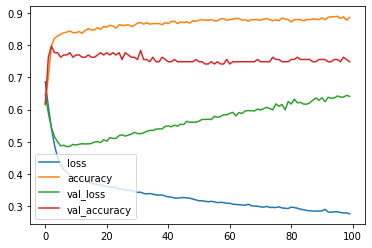

In [98]:
pd.DataFrame(clf.history.history).plot()

In [99]:
clf.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.8212


[0.5438936948776245, 0.8212290406227112]